In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv('OnlineNewsPopularity.csv', sep=', ')
data = data.dropna()
data = data.to_numpy()

samples = data[:,2:60]
classes = data[:,60:]

samples = np.asarray(samples).astype(np.float32)
classes = np.asarray(classes).astype(np.float32)

In [5]:
X_train_full, X_test, y_train_full, y_test = train_test_split(samples, classes)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [6]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="sigmoid", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
697/697 [==============================] - 0s 678us/step - loss: 128881576.0000 - val_loss: 192005552.0000
Epoch 2/20
697/697 [==============================] - 0s 509us/step - loss: 128008200.0000 - val_loss: 191435472.0000
Epoch 3/20
697/697 [==============================] - 0s 510us/step - loss: 127980304.0000 - val_loss: 191197872.0000
Epoch 4/20
697/697 [==============================] - 0s 516us/step - loss: 128298712.0000 - val_loss: 191872736.0000
Epoch 5/20
697/697 [==============================] - 0s 505us/step - loss: 128193048.0000 - val_loss: 191570192.0000
Epoch 6/20
697/697 [==============================] - 0s 512us/step - loss: 128175192.0000 - val_loss: 191705712.0000
Epoch 7/20
697/697 [==============================] - 0s 520us/step - loss: 128025536.0000 - val_loss: 191607440.0000
Epoch 8/20
697/697 [==============================] - 0s 520us/step - loss: 127958744.0000 - val_loss: 191513904.0000
Epoch 9/20
697/697 [==============================] - 0s

In [7]:
mse_test = model.evaluate(X_test, y_test)

310/310 [==============================] - 0s 367us/step - loss: 101664976.0000


In [8]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

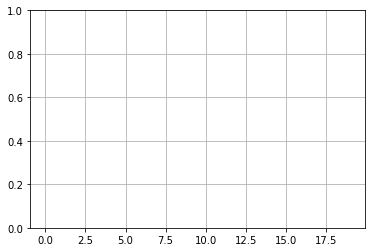

In [9]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()